0.006366144673885632


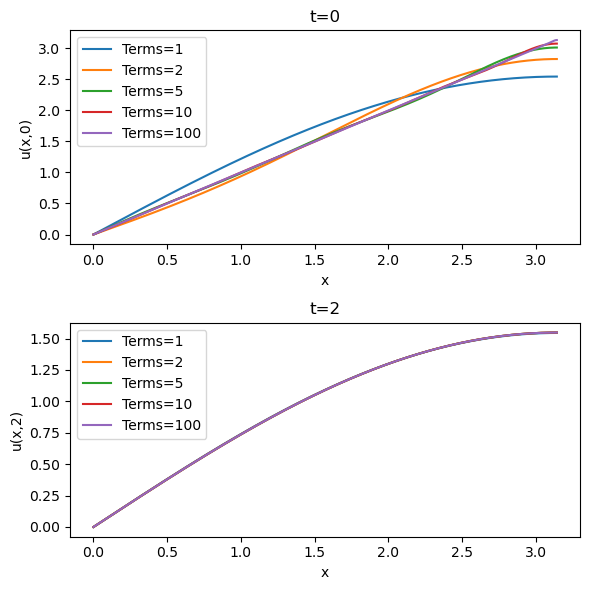

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

plt.rcParams.update({'font.size': 10})

def compute_series_terms(x, t, num_terms):
    result = 0
    for k in range(num_terms):
        result += 8 * (-1) ** k / (pi * (2 * k + 1) ** 2) * np.exp(-(2 * k + 1) ** 2 * t / 4) * np.sin((2 * k + 1) * x / 2)
    return result
    
num_x_values = 1000
x_values = np.linspace(0, pi, num_x_values)
num_terms_values = [1, 2, 5, 10, 100]

fig, ax = plt.subplots(2, 1, figsize=(6, 6))

# Time 0
max_errors = []
for num_terms in num_terms_values:
    y_values = [compute_series_terms(x, 0, num_terms) for x in x_values]
    ax[0].plot(x_values, y_values)
    max_errors.append(max([abs(y_values[i] - x_values[i]) for i in range(num_x_values)]))
ax[0].legend(['Terms=' + str(num_terms) for num_terms in num_terms_values])
ax[0].set_title(r't=0')
ax[0].set_xlabel('x')
ax[0].set_ylabel('u(x,0)')

# # Show maximum error
# ax[2].plot(num_terms_values, max_errors)
# ax[2].set_title('Max error at t=0')
# ax[2].set_xlabel('Terms')
# ax[2].set_ylabel('Max error')
# # ax[2].set_xscale('log')
# # ax[2].set_yscale('log')
print(max_errors[-1])

# Time 2
for num_terms in num_terms_values:
    y_values = [compute_series_terms(x, 2, num_terms) for x in x_values]
    ax[1].plot(x_values, y_values)
ax[1].legend(['Terms=' + str(num_terms) for num_terms in num_terms_values])
ax[1].set_title(r't=2')
ax[1].set_xlabel('x')
ax[1].set_ylabel('u(x,2)')

plt.tight_layout()
